# Load dataset and preview
This notebook loads the local file Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv and prints the top rows.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklift.datasets import fetch_hillstrom

# 1. Fetch the data
print("🔄 Loading Data...")
dataset = fetch_hillstrom(target_col='conversion')
df = dataset.data  # Loads features like History, Zip Code, etc.

# 2. FIX: Explicitly name the columns 'segment' and 'target'
# The dataset.treatment contains values like "Mens E-Mail", "Womens E-Mail"
df['segment'] = dataset.treatment  
df['target'] = dataset.target

# 3. VERIFY: Print columns to be sure
print(f"Columns present: {df.columns.tolist()}")

# 4. FILTER: Keep only "Mens E-Mail" and "No E-Mail"
# Now this will work because the column 'segment' exists!
df = df[df['segment'] != 'Womens E-Mail'].copy()

# 5. CREATE BINARY TREATMENT:
# 1 = Got Email, 0 = No Email
df['treatment'] = df['segment'].apply(lambda x: 1 if x == 'Mens E-Mail' else 0)

print(f"✅ Success! Filtered Data Shape: {df.shape}")
print(df.head(5))

🔄 Loading Data...
Columns present: ['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel', 'segment', 'target']
✅ Success! Filtered Data Shape: (42613, 11)
    recency history_segment  history  mens  womens zip_code  newbie  \
1         6  3) $200 - $350   329.08     1       1    Rural       1   
3         9  5) $500 - $750   675.83     1       0    Rural       1   
8         9  5) $500 - $750   675.07     1       1    Rural       1   
13        2  2) $100 - $200   101.64     0       1    Urban       0   
14        4  3) $200 - $350   241.42     0       1    Rural       1   

         channel      segment  target  treatment  
1            Web    No E-Mail       0          0  
3            Web  Mens E-Mail       0          1  
8          Phone  Mens E-Mail       0          1  
13           Web  Mens E-Mail       0          1  
14  Multichannel    No E-Mail       0          0  


c:\Users\anupa\Desktop\machine learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42613 entries, 1 to 63999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          42613 non-null  int64  
 1   history_segment  42613 non-null  object 
 2   history          42613 non-null  float64
 3   mens             42613 non-null  int64  
 4   womens           42613 non-null  int64  
 5   zip_code         42613 non-null  object 
 6   newbie           42613 non-null  int64  
 7   channel          42613 non-null  object 
 8   segment          42613 non-null  object 
 9   target           42613 non-null  int64  
 10  treatment        42613 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 3.9+ MB


In [4]:
# Now we can group by 'treatment' (0 or 1) or 'segment' (Text)
conversion_rates = df.groupby('segment')['target'].mean().reset_index()
conversion_rates.columns = ['Group', 'Conversion Rate']

print("\n--- Baseline Conversion Rates ---")
print(conversion_rates)


--- Baseline Conversion Rates ---
         Group  Conversion Rate
0  Mens E-Mail         0.012531
1    No E-Mail         0.005726


C:\Users\anupa\AppData\Local\Temp\ipykernel_8512\389009995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_rates, x='Group', y='Conversion Rate', palette=['gray', 'blue'])


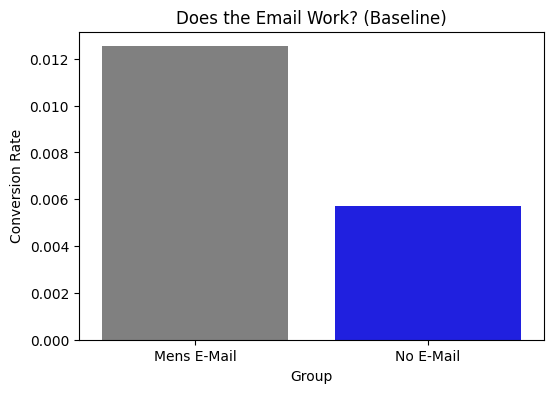

In [5]:
plt.figure(figsize=(6, 4))
sns.barplot(data=conversion_rates, x='Group', y='Conversion Rate', palette=['gray', 'blue'])
plt.title('Does the Email Work? (Baseline)')
plt.show()

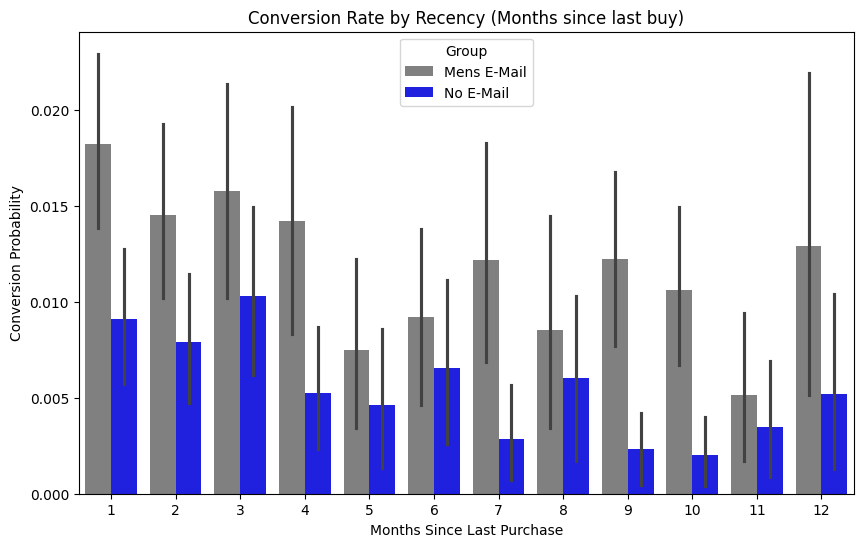

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='recency', y='target', hue='segment', palette=['gray', 'blue'])

plt.title('Conversion Rate by Recency (Months since last buy)')
plt.ylabel('Conversion Probability')
plt.xlabel('Months Since Last Purchase')
plt.legend(title='Group')
plt.show()

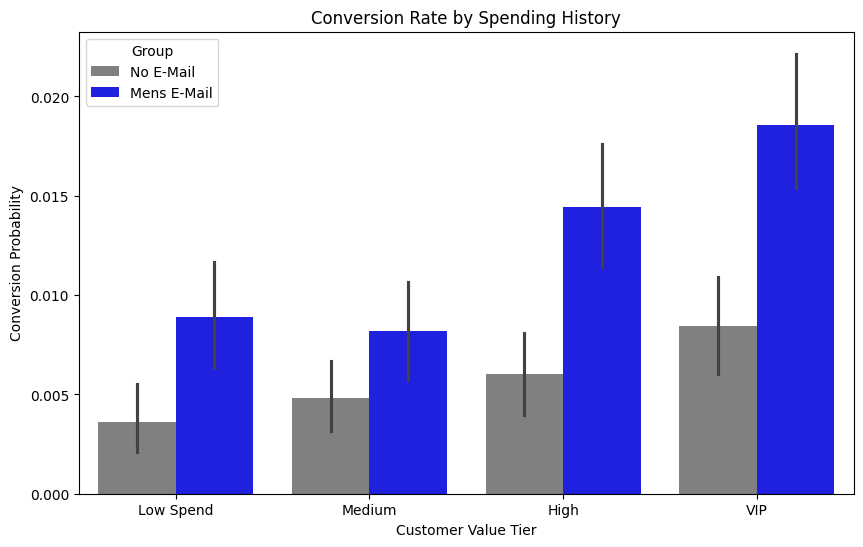

In [10]:
df['history_bins'] = pd.qcut(df['history'], q=4, labels=['Low Spend', 'Medium', 'High', 'VIP'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='history_bins', y='target', hue='segment', palette=['gray', 'blue'])

plt.title('Conversion Rate by Spending History')
plt.ylabel('Conversion Probability')
plt.xlabel('Customer Value Tier')
plt.legend(title='Group')
plt.show()

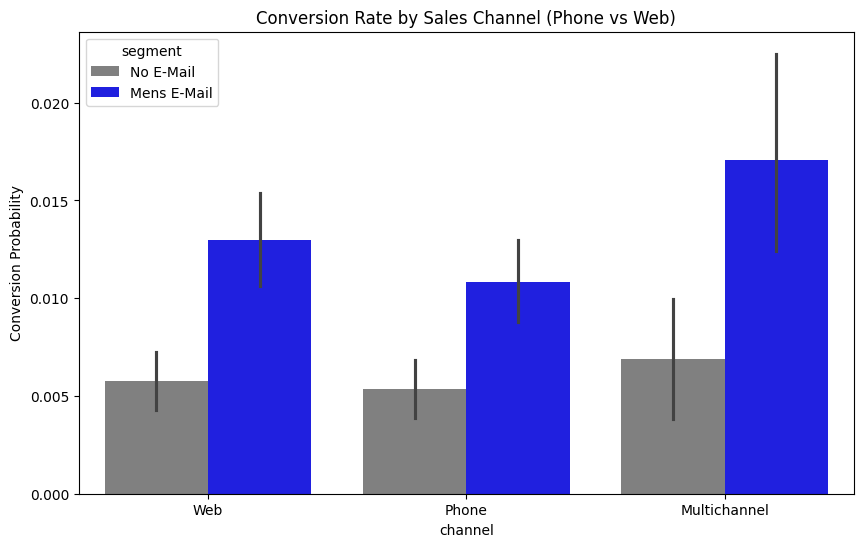

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='channel', y='target', hue='segment', palette=['gray', 'blue'])
plt.title('Conversion Rate by Sales Channel (Phone vs Web)')
plt.ylabel('Conversion Probability')
plt.show()

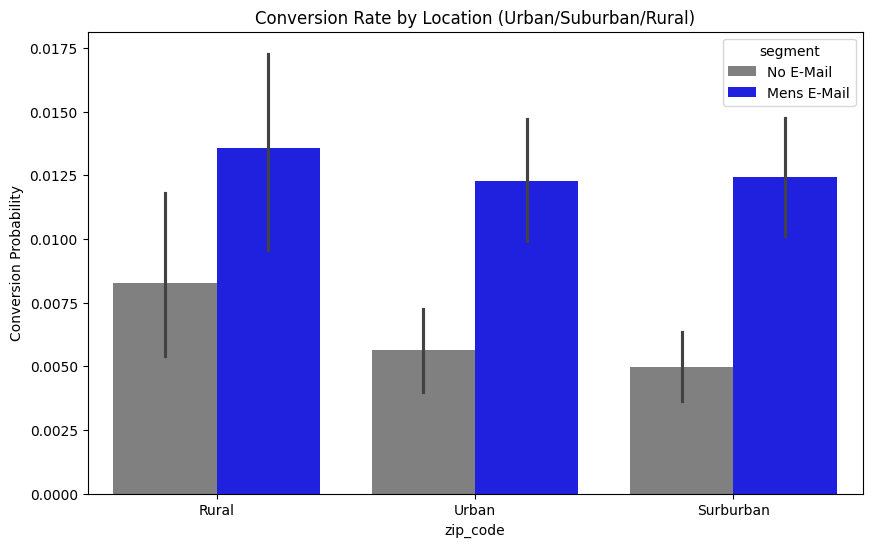

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='zip_code', y='target', hue='segment', palette=['gray', 'blue'])
plt.title('Conversion Rate by Location (Urban/Suburban/Rural)')
plt.ylabel('Conversion Probability')
plt.show()

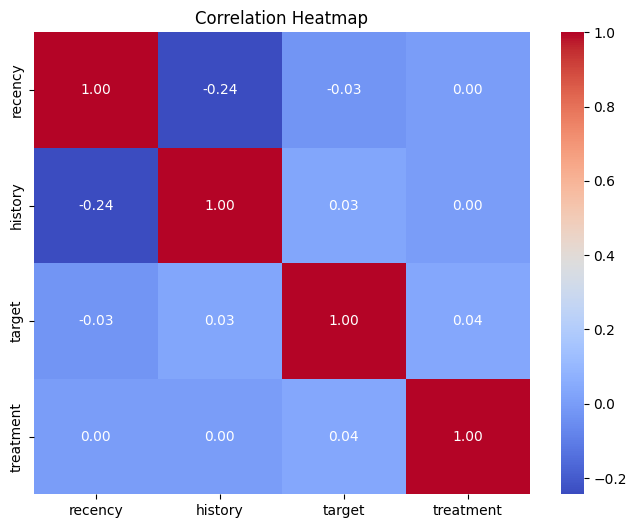

In [13]:
numeric_cols = ['recency', 'history', 'target', 'treatment']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

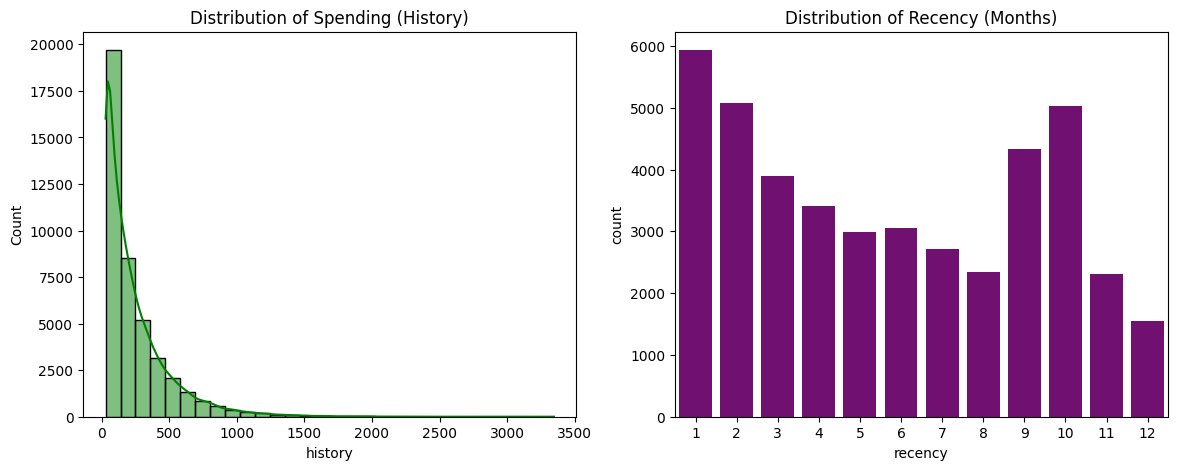

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Histogram of Spending (History)
sns.histplot(data=df, x='history', bins=30, kde=True, ax=axes[0], color='green')
axes[0].set_title('Distribution of Spending (History)')

# Plot 2: Count of Recency (Months)
sns.countplot(data=df, x='recency', ax=axes[1], color='purple')
axes[1].set_title('Distribution of Recency (Months)')

plt.show()

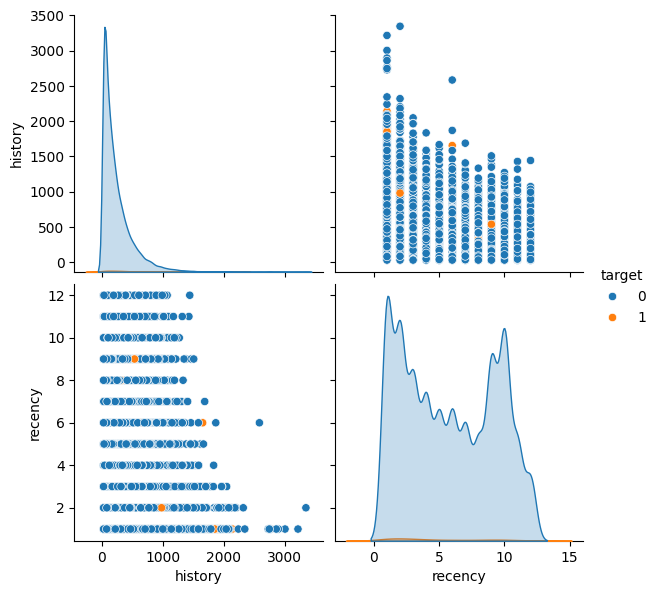

In [15]:
# Select a subset of columns to keep the plot readable
cols_to_plot = ['history', 'recency', 'target']

# hue='treatment' colors the dots by whether they got an email
sns.pairplot(df[cols_to_plot], hue='target', height=3)
plt.show()

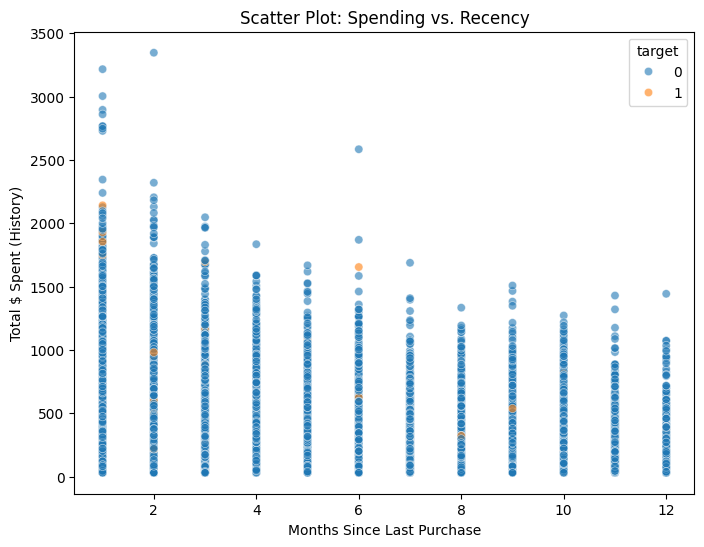

In [16]:
plt.figure(figsize=(8, 6))

# X-axis = How many months since last buy
# Y-axis = How much money they spent
# Hue = Did they convert? (Orange = Yes, Blue = No)
sns.scatterplot(data=df, x='recency', y='history', hue='target', alpha=0.6)

plt.title('Scatter Plot: Spending vs. Recency')
plt.xlabel('Months Since Last Purchase')
plt.ylabel('Total $ Spent (History)')
plt.show()